# **Using Pre-trained Models in Keras to get Rank-1 and Rank-5 Accuracy**
1. We'll first load the pre-trained ImageNet model MobileNetV2
2. We'll get the top 5 classes from a single image inference
3. Next we'll construct a function to give us the rank-N Accuracy using a few test images


In [1]:
# Load our pre-trained MobileNetV2 Model

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

In [2]:
# Get the imageNet Class label names and test images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
!unzip imagesDLCV.zip
!rm -rf ./images/class1/.DS_Store

--2023-10-24 03:04:41--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.178, 3.5.245.154, 52.95.144.34, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457845 (1.4M) [application/zip]
Saving to: ‘imagesDLCV.zip’

imagesDLCV.zip      100%[===================>]   1.39M  1.72MB/s    in 0.8s    

2023-10-24 03:04:43 (1.72 MB/s) - ‘imagesDLCV.zip’ saved [1457845/1457845]

Archive:  imagesDLCV.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/class1/
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/cl

In [3]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['German_Shepherd_-_DSC_0346_(10096362833).jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'spiderweb_1050x700.jpg',
 '1539714414867.jpg',
 'long-haired-collie-5766447_1280.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'Basketball_(Ball).jpg',
 'download.jpg',
 'limo-safety-ftr.jpg']

1/1 [==============================] - 0s 22ms/step


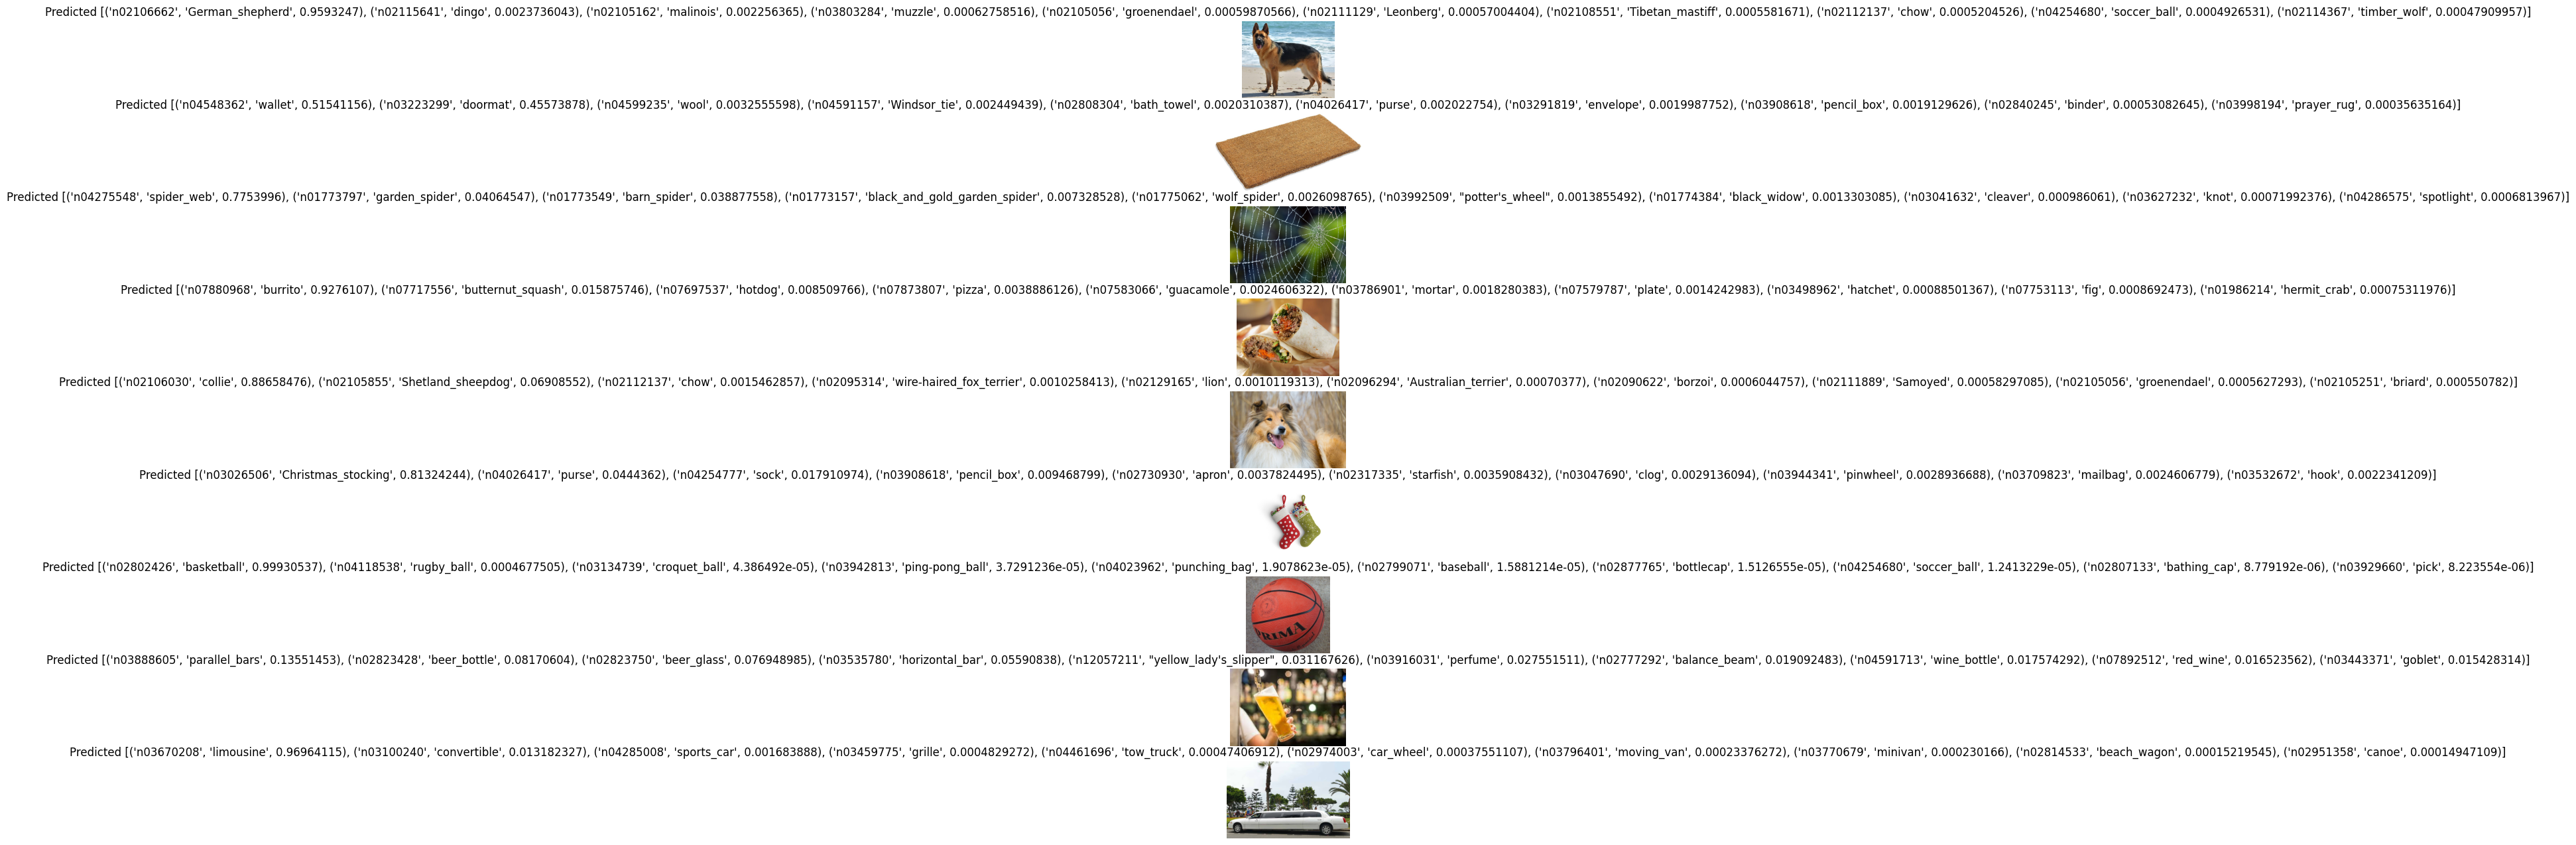

In [4]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))
all_top_classes = []

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=10)[0]
    all_top_classes.append([x[1] for x in preditions])
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions)}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [5]:
preditions

[('n03670208', 'limousine', 0.96964115),
 ('n03100240', 'convertible', 0.013182327),
 ('n04285008', 'sports_car', 0.001683888),
 ('n03459775', 'grille', 0.0004829272),
 ('n04461696', 'tow_truck', 0.00047406912),
 ('n02974003', 'car_wheel', 0.00037551107),
 ('n03796401', 'moving_van', 0.00023376272),
 ('n03770679', 'minivan', 0.000230166),
 ('n02814533', 'beach_wagon', 0.00015219545),
 ('n02951358', 'canoe', 0.00014947109)]

In [6]:
all_top_classes

[['German_shepherd',
  'dingo',
  'malinois',
  'muzzle',
  'groenendael',
  'Leonberg',
  'Tibetan_mastiff',
  'chow',
  'soccer_ball',
  'timber_wolf'],
 ['wallet',
  'doormat',
  'wool',
  'Windsor_tie',
  'bath_towel',
  'purse',
  'envelope',
  'pencil_box',
  'binder',
  'prayer_rug'],
 ['spider_web',
  'garden_spider',
  'barn_spider',
  'black_and_gold_garden_spider',
  'wolf_spider',
  "potter's_wheel",
  'black_widow',
  'cleaver',
  'knot',
  'spotlight'],
 ['burrito',
  'butternut_squash',
  'hotdog',
  'pizza',
  'guacamole',
  'mortar',
  'plate',
  'hatchet',
  'fig',
  'hermit_crab'],
 ['collie',
  'Shetland_sheepdog',
  'chow',
  'wire-haired_fox_terrier',
  'lion',
  'Australian_terrier',
  'borzoi',
  'Samoyed',
  'groenendael',
  'briard'],
 ['Christmas_stocking',
  'purse',
  'sock',
  'pencil_box',
  'apron',
  'starfish',
  'clog',
  'pinwheel',
  'mailbag',
  'hook'],
 ['basketball',
  'rugby_ball',
  'croquet_ball',
  'ping-pong_ball',
  'punching_bag',
  'base

In [22]:
# Create our ground truth labels
ground_truth = ['German shepherd',
                'doormat',
                "spider_web",
                'burrito',
                'collie',
                'Christmas_stocking',
                'basketball',
                'beer_glass',
                'limousine, limo'
               ]

In [23]:
def getScore(all_top_classes, ground_truth, N):
  # Calcuate rank-N score
  in_labels = 0
  for (i,labels) in enumerate(all_top_classes):
    if ground_truth[i] in labels[:N]:
      in_labels += 1
  return f'Rank-{N} Accuracy = {in_labels/len(all_top_classes)*100:.2f}%'

## **Get Rank-5 Accuracy**

In [24]:
getScore(all_top_classes, ground_truth, 5)

'Rank-5 Accuracy = 77.78%'

In [25]:
getScore(all_top_classes, ground_truth, 1)

'Rank-1 Accuracy = 55.56%'

In [26]:
getScore(all_top_classes, ground_truth, 10)

'Rank-10 Accuracy = 77.78%'